In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
Fertility_data=pd.read_csv(r"C:\Users\kalpana\Documents\Crop-Prediction source code\Karandala.csv")

In [3]:
Fertility_data.drop('Textbox80',axis=1, inplace=True)

In [4]:
Fertility_data.drop(['SurveyNo','longitude','Latitude','P1', 'EC1', 'pH1','K1','OC1',
       'Zn1', 'Fe1', 'Cu1', 'Mn1', 'B1', 'S1'], axis=1, inplace=True)

In [5]:
Fertility_data.columns

Index(['Farmer_Name', 'village_name', 'N', 'P', 'EC', 'pH', 'K', 'OC', 'Zn',
       'Fe', 'Cu', 'Mn', 'B', 'S', 'N1'],
      dtype='object')

In [6]:
Fertility_data.head()

,Farmer_Name,village_name,N,P,EC,pH,K,OC,Zn,Fe,Cu,Mn,B,S,N1
0,DADAJI MADHAV RAMTEKE,Karandla,274.40,15.50,0.20,6.20,205.80,0.42,NaN,NaN,NaN,NaN,NaN,NaN,L
1,MANGESH DEVRAM MOTGHARE,Karandla,338.69,10.32,0.37,6.61,468.16,0.20,0.46,4.78,1.44,9.71,1.07,4.44,M
2,VASANTA NAMDEW TARHEKAR,Karandla,301.06,19.78,0.18,7.37,409.92,1.13,0.65,1.99,3.00,14.86,0.91,63.53,M
3,TANAJI KASHIRAM RAMTEKE,Karandla,301.06,19.78,0.18,7.37,409.92,1.13,0.65,1.99,3.00,14.86,0.91,63.53,M
4,VASUDEW BAJIRAV PANDE,Karandla,225.79,24.08,0.39,8.06,679.84,0.91,0.23,2.51,0.74,15.18,0.35,36.43,L


In [7]:
Fertility_data.columns

Index(['Farmer_Name', 'village_name', 'N', 'P', 'EC', 'pH', 'K', 'OC', 'Zn',
       'Fe', 'Cu', 'Mn', 'B', 'S', 'N1'],
      dtype='object')

In [8]:
Fertility_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716 entries, 0 to 715
Data columns (total 15 columns):
Farmer_Name     716 non-null object
village_name    716 non-null object
N               716 non-null float64
P               716 non-null float64
EC              716 non-null float64
pH              716 non-null float64
K               716 non-null float64
OC              716 non-null float64
Zn              707 non-null float64
Fe              707 non-null float64
Cu              707 non-null float64
Mn              703 non-null float64
B               707 non-null float64
S               707 non-null float64
N1              716 non-null object
dtypes: float64(12), object(3)
memory usage: 75.6+ KB


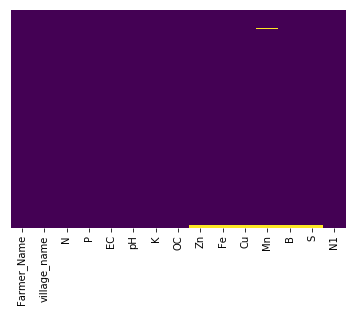

In [9]:
sns.heatmap(Fertility_data.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [10]:
Fertility_data.size


10740

In [11]:
FD1=Fertility_data.dropna()

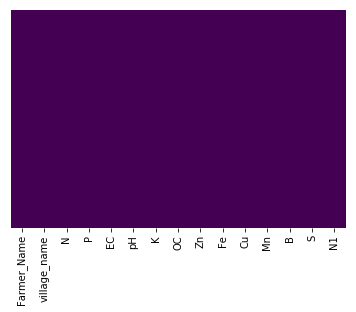

In [12]:
sns.heatmap(FD1.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [13]:
FD1.size

10545

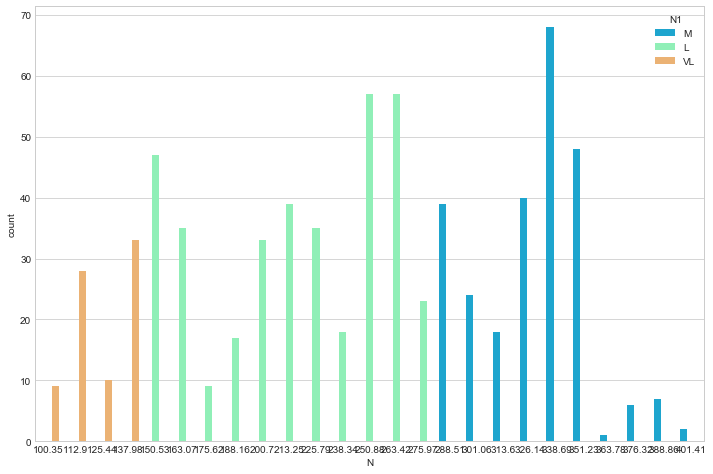

In [14]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.countplot(x='N', hue='N1',data=FD1,palette='rainbow')

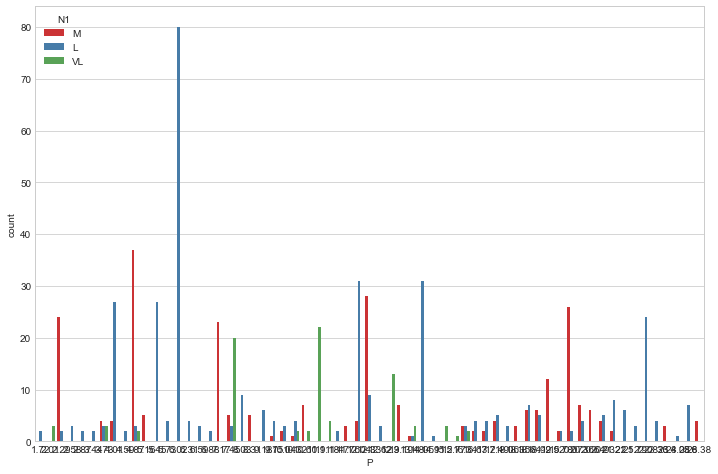

In [15]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.countplot(x='P',hue='N1',data=FD1,palette='Set1')

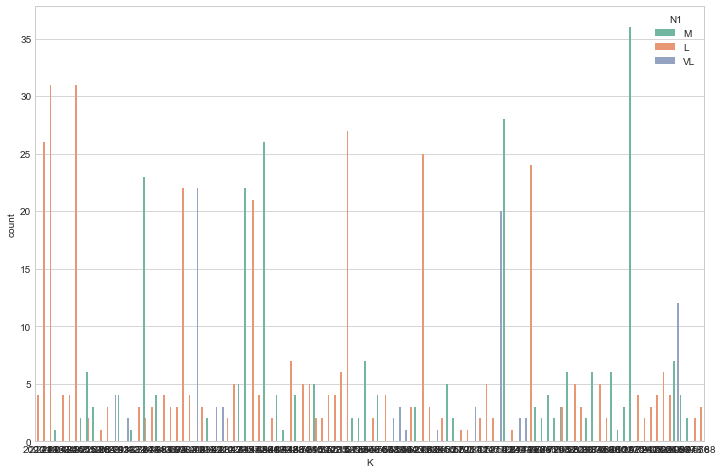

In [16]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.countplot(x='K',hue='N1',data=FD1,palette='Set2')

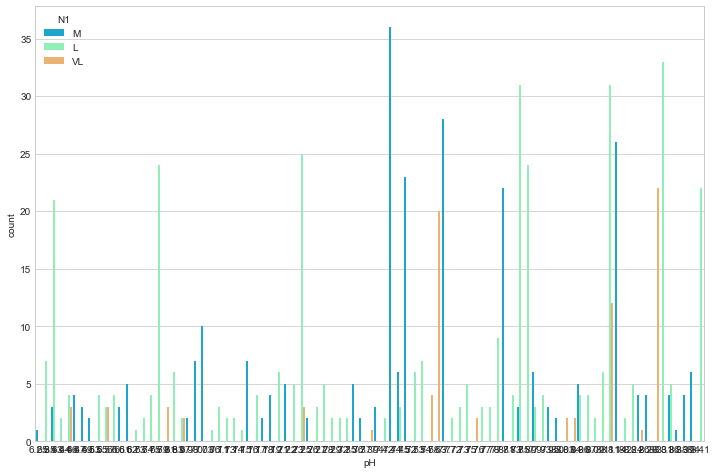

In [17]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.countplot(x='pH',hue='N1',data=FD1,palette='rainbow')


Text(0.5,0,'N')

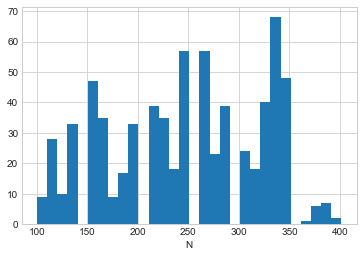

In [18]:
sns.set_style('whitegrid')
FD1['N'].hist(bins=30)
plt.xlabel('N')


In [19]:
FD1.columns

Index(['Farmer_Name', 'village_name', 'N', 'P', 'EC', 'pH', 'K', 'OC', 'Zn',
       'Fe', 'Cu', 'Mn', 'B', 'S', 'N1'],
      dtype='object')

In [20]:
FD1.drop(['Farmer_Name', 'village_name'], axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
FD1.columns

Index(['N', 'P', 'EC', 'pH', 'K', 'OC', 'Zn', 'Fe', 'Cu', 'Mn', 'B', 'S',
       'N1'],
      dtype='object')

In [22]:
x = FD1[['N', 'P', 'EC', 'pH', 'K', 'OC', 'Zn', 'Fe', 'Cu', 'Mn', 'B', 'S']]

In [23]:
y=FD1['N1']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
lm=LogisticRegression()

In [28]:
lm.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
prediction=lm.predict(X_test)

In [30]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [31]:
print(classification_report(y_test,prediction))

             precision    recall  f1-score   support

          L       0.96      0.96      0.96        79
          M       0.93      0.93      0.93        42
         VL       1.00      1.00      1.00        20

avg / total       0.96      0.96      0.96       141



In [32]:
print(confusion_matrix(y_test,prediction))

[[76  3  0]
 [ 3 39  0]
 [ 0  0 20]]


In [33]:
print(accuracy_score(y_test,prediction))

0.957446808511


In [34]:
# SVM

In [35]:
from sklearn.svm import SVC

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [38]:
sm=SVC()

In [39]:
sm.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [40]:
pred=sm.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [42]:
print(confusion_matrix(y_test,pred))

[[74  0  0]
 [ 6 45  0]
 [ 0  0 16]]


In [43]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          L       0.93      1.00      0.96        74
          M       1.00      0.88      0.94        51
         VL       1.00      1.00      1.00        16

avg / total       0.96      0.96      0.96       141



In [44]:
print(accuracy_score(y_test,pred))

0.957446808511


In [45]:
pred[55]

'L'

In [46]:
y_test[55]

'L'

In [47]:
# Decision tree and Random Forest

In [48]:
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor

In [49]:
dt=DecisionTreeClassifier()

In [50]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [51]:
pred1=dt.predict(X_test)

In [52]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [53]:
print(classification_report(y_test,pred1))

             precision    recall  f1-score   support

          L       1.00      1.00      1.00        74
          M       1.00      1.00      1.00        51
         VL       1.00      1.00      1.00        16

avg / total       1.00      1.00      1.00       141



In [54]:
print(confusion_matrix(y_test,pred1))

[[74  0  0]
 [ 0 51  0]
 [ 0  0 16]]


In [55]:
print(accuracy_score(y_test,pred1))

1.0


In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
rf=RandomForestClassifier(n_estimators=10)

In [58]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [59]:
pred2=rf.predict(X_test)

In [60]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [61]:
print(confusion_matrix(y_test,pred2))

[[74  0  0]
 [ 0 51  0]
 [ 0  0 16]]


In [62]:
print(classification_report(y_test,pred2))

             precision    recall  f1-score   support

          L       1.00      1.00      1.00        74
          M       1.00      1.00      1.00        51
         VL       1.00      1.00      1.00        16

avg / total       1.00      1.00      1.00       141



In [63]:
print(accuracy_score(y_test,pred2))

1.0


In [64]:
pred2[55]

'L'

In [65]:
y_test[55]

'L'

In [66]:
# KNN

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
scaler=StandardScaler()

In [69]:
scaler.fit(FD1.drop('N1',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [70]:
scaler_feature=scaler.transform(FD1.drop('N1',axis=1))

In [71]:
df_feat=pd.DataFrame(scaler_feature,columns=FD1.columns[:-1])
df_feat.head()

,N,P,EC,pH,K,OC,Zn,Fe,Cu,Mn,B,S
0,1.210890,-0.161251,-0.128474,-1.702045,-0.326560,-1.418672,-0.221442,0.186322,-0.382841,-0.811163,0.610925,-1.583279
1,0.715534,1.323833,-0.282696,-0.382609,-0.578906,1.514920,0.669195,-1.269753,1.506861,0.163115,0.189220,1.355761
2,0.715534,1.323833,-0.282696,-0.382609,-0.578906,1.514920,0.669195,-1.269753,1.506861,0.163115,0.189220,1.355761
3,-0.275311,1.998871,-0.112240,0.815300,0.590620,0.820952,-1.299582,-0.998370,-1.230784,0.223652,-1.286748,0.007851
4,-1.266024,0.019283,-0.079772,-0.417331,1.653384,0.820952,-0.080815,0.024536,-0.116344,-0.858458,-0.416981,0.869320


In [72]:
from sklearn.model_selection import train_test_split

In [73]:
 X_train, X_test, y_train, y_test = train_test_split(scaler_feature,FD1['N1'],test_size=0.2)

In [74]:
from sklearn.neighbors import KNeighborsClassifier

In [75]:
kn=KNeighborsClassifier(n_neighbors=5)

In [76]:
kn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [77]:
prediction1=kn.predict(X_test)

In [78]:
from sklearn.metrics import confusion_matrix,classification_report

In [79]:
print(confusion_matrix(y_test,prediction1))

[[65  6  5]
 [ 4 46  0]
 [ 1  0 14]]


In [80]:
print(classification_report(y_test,prediction1))

             precision    recall  f1-score   support

          L       0.93      0.86      0.89        76
          M       0.88      0.92      0.90        50
         VL       0.74      0.93      0.82        15

avg / total       0.89      0.89      0.89       141



In [99]:
prediction1[39]

'L'

In [98]:
y_test[39]

'L'

In [ ]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    kn = KNeighborsClassifier(n_neighbors=i)
    kn.fit(X_train,y_train)
    pred_i = kn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
kn = KNeighborsClassifier(n_neighbors=1)

kn.fit(X_train,y_train)
pred = kn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,prediction1))
print('\n')
print(classification_report(y_test,prediction1))

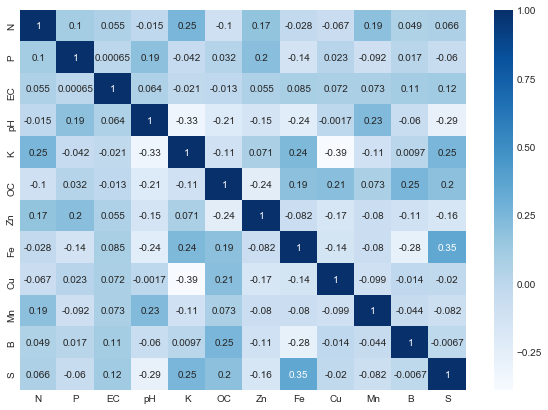

In [95]:
plt.figure(figsize=(10,7))
sns.set_style
sns.heatmap(FD1.corr(),cmap='Blues',annot=True, linewidths=0, linecolor='red' )